# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
import json
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

## Read the data CSV from your s3 bucket.

In [2]:
# # read the credentials
with open('aws_credentials.json') as f:
    aws_credentials = json.load(f)

In [3]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials

df = pd.read_csv("s3://mds-s3-24/output/ml_data_SYD.csv",
                 index_col=0,
                 parse_dates=True,
                 storage_options=aws_credentials)

In [4]:
## Use your ML skills to get from step 1 to step 6

df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [5]:
# Verifying for Nan in the train dataset
df.isnull().sum()

ACCESS-CM2            0
ACCESS-ESM1-5         0
AWI-ESM-1-1-LR        0
BCC-CSM2-MR          30
BCC-ESM1             30
CMCC-CM2-HR4         30
CMCC-CM2-SR5         30
CMCC-ESM2            30
CanESM5              30
EC-Earth3-Veg-LR      0
FGOALS-g3            30
GFDL-CM4             30
INM-CM4-8            30
INM-CM5-0            30
KIOST-ESM            30
MIROC6                0
MPI-ESM-1-2-HAM       0
MPI-ESM1-2-HR         0
MPI-ESM1-2-LR         0
MRI-ESM2-0            0
NESM3                 0
NorESM2-LM           30
NorESM2-MM           30
SAM0-UNICON          31
TaiESM1              30
observed_rainfall     0
dtype: int64

## Dropping Nan values

In [6]:
df = df.dropna()

In [7]:
df.shape

(45989, 26)

In [8]:
# Verifying if any Nan;s are still present 
df.isnull().sum()

ACCESS-CM2           0
ACCESS-ESM1-5        0
AWI-ESM-1-1-LR       0
BCC-CSM2-MR          0
BCC-ESM1             0
CMCC-CM2-HR4         0
CMCC-CM2-SR5         0
CMCC-ESM2            0
CanESM5              0
EC-Earth3-Veg-LR     0
FGOALS-g3            0
GFDL-CM4             0
INM-CM4-8            0
INM-CM5-0            0
KIOST-ESM            0
MIROC6               0
MPI-ESM-1-2-HAM      0
MPI-ESM1-2-HR        0
MPI-ESM1-2-LR        0
MRI-ESM2-0           0
NESM3                0
NorESM2-LM           0
NorESM2-MM           0
SAM0-UNICON          0
TaiESM1              0
observed_rainfall    0
dtype: int64

## Split the data into train (80%) and test (20%)

In [9]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=123)

In [10]:
train_df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
time,,,,,,,,,,,,,,,,,,,,,
1953-10-26,17.906051,0.837579,9.753198e-14,0.018863,2.878923e-01,0.007043,0.122719,10.855838,0.022752,0.472927,...,6.688447e+00,2.860546,9.779330e-14,2.980863e-01,1.659176e-13,3.841924e+00,2.713473,0.659440,0.129196,1.833044
1921-10-22,0.515505,1.911354,1.135404e+00,0.000002,4.091981e-01,0.009669,0.074208,1.239226,3.566098,0.667190,...,2.368273e-01,0.652848,1.132699e-13,7.653117e-08,4.560164e-03,4.178978e-02,7.909935,0.206765,2.018346,4.038183
1925-01-22,0.161412,2.666091,7.012887e-02,2.040689,1.338349e+01,0.073243,0.000255,1.349633,0.075959,0.059223,...,1.082573e-01,2.977031,1.320287e-13,1.937005e-04,1.692996e-13,1.290949e-03,0.183711,1.733777,0.932259,0.419818
1902-11-21,3.651607,3.117433,1.142701e-13,0.000016,4.658142e-09,3.913076,9.442968,0.720382,5.314680,0.122738,...,1.635075e-01,0.021314,9.901551e-01,1.142382e+00,1.840662e-03,4.955181e-02,0.000068,12.988330,0.005468,0.698486
1925-02-17,0.635625,39.042773,1.084678e+00,31.690315,6.208601e-09,0.416932,0.733783,0.004239,0.439862,0.404930,...,4.388535e-13,0.025447,2.918170e+00,1.314147e-01,3.690330e-01,2.357034e-08,0.036247,0.298767,2.923645,0.000000


In [11]:
train_df.shape

(36791, 26)

In [12]:
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36791 entries, 1953-10-26 to 1932-01-31
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCESS-CM2         36791 non-null  float64
 1   ACCESS-ESM1-5      36791 non-null  float64
 2   AWI-ESM-1-1-LR     36791 non-null  float64
 3   BCC-CSM2-MR        36791 non-null  float64
 4   BCC-ESM1           36791 non-null  float64
 5   CMCC-CM2-HR4       36791 non-null  float64
 6   CMCC-CM2-SR5       36791 non-null  float64
 7   CMCC-ESM2          36791 non-null  float64
 8   CanESM5            36791 non-null  float64
 9   EC-Earth3-Veg-LR   36791 non-null  float64
 10  FGOALS-g3          36791 non-null  float64
 11  GFDL-CM4           36791 non-null  float64
 12  INM-CM4-8          36791 non-null  float64
 13  INM-CM5-0          36791 non-null  float64
 14  KIOST-ESM          36791 non-null  float64
 15  MIROC6             36791 non-null  float64
 16  MPI-E

array([[<AxesSubplot:title={'center':'ACCESS-CM2'}>,
        <AxesSubplot:title={'center':'ACCESS-ESM1-5'}>,
        <AxesSubplot:title={'center':'AWI-ESM-1-1-LR'}>,
        <AxesSubplot:title={'center':'BCC-CSM2-MR'}>,
        <AxesSubplot:title={'center':'BCC-ESM1'}>],
       [<AxesSubplot:title={'center':'CMCC-CM2-HR4'}>,
        <AxesSubplot:title={'center':'CMCC-CM2-SR5'}>,
        <AxesSubplot:title={'center':'CMCC-ESM2'}>,
        <AxesSubplot:title={'center':'CanESM5'}>,
        <AxesSubplot:title={'center':'EC-Earth3-Veg-LR'}>],
       [<AxesSubplot:title={'center':'FGOALS-g3'}>,
        <AxesSubplot:title={'center':'GFDL-CM4'}>,
        <AxesSubplot:title={'center':'INM-CM4-8'}>,
        <AxesSubplot:title={'center':'INM-CM5-0'}>,
        <AxesSubplot:title={'center':'KIOST-ESM'}>],
       [<AxesSubplot:title={'center':'MIROC6'}>,
        <AxesSubplot:title={'center':'MPI-ESM-1-2-HAM'}>,
        <AxesSubplot:title={'center':'MPI-ESM1-2-HR'}>,
        <AxesSubplot:title={'cent

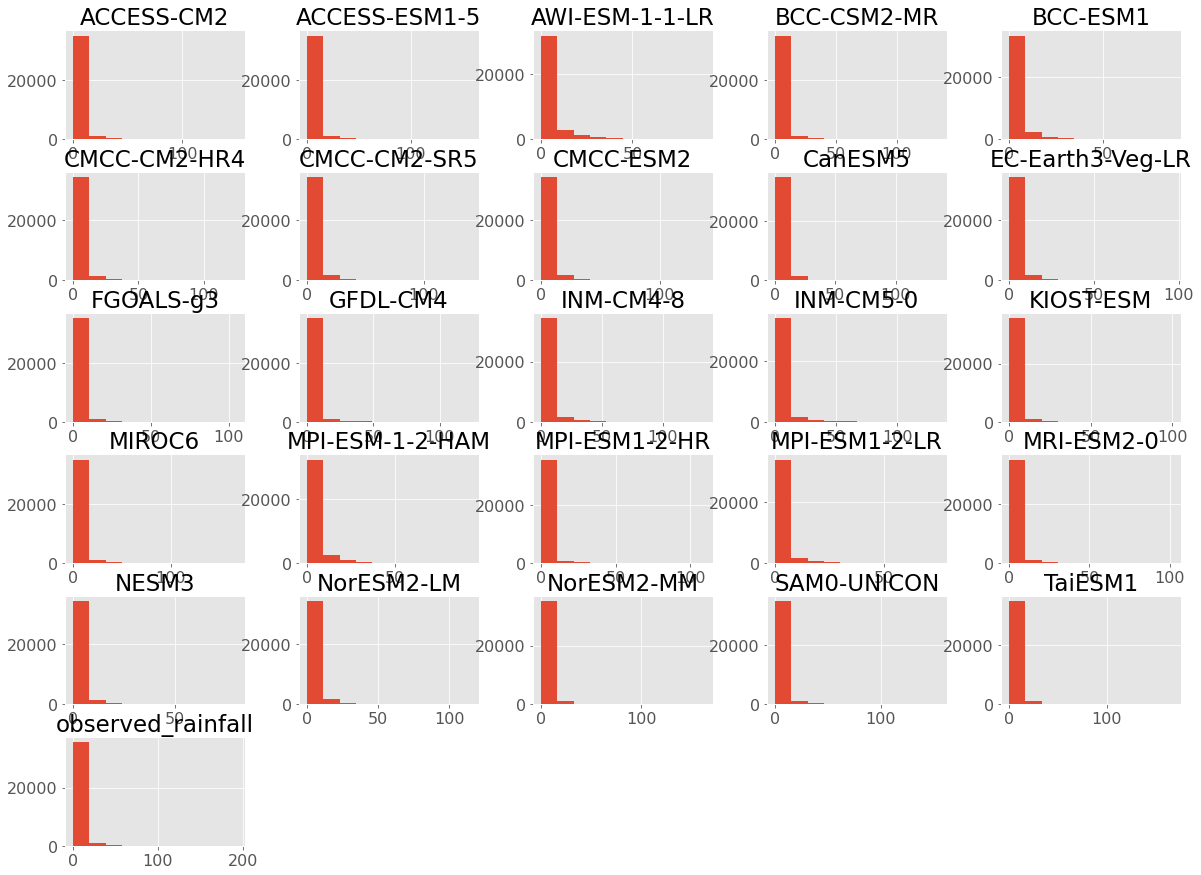

In [14]:
train_df.hist(bins = 10, figsize =(20,15))

## Form the target colum

In [15]:
X_train = train_df.drop(columns=["observed_rainfall"])
y_train = train_df["observed_rainfall"]

X_test = test_df.drop(columns=["observed_rainfall"])
y_test = test_df["observed_rainfall"]

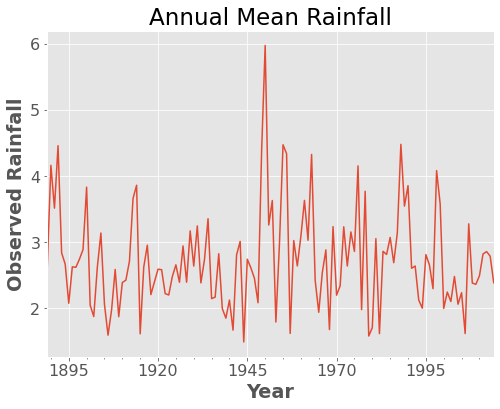

In [16]:
# Time Series Plot of Annual Mean Rainfall 

y_train.resample('Y').mean().plot.line(xlabel="Year", ylabel="Observed Rainfall", legend=False)
plt.title('Annual Mean Rainfall')
plt.show()

In [17]:
model = RandomForestRegressor(random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [18]:
# scoring = [ 'precision', 'recall', 'f1', 'roc_auc']
results = {}
results['RandomForest_default'] = pd.DataFrame(cross_validate(model, X_train, y_train, scoring= 'neg_root_mean_squared_error')).mean()
pd.DataFrame(results)

,RandomForest_default
fit_time,134.673875
score_time,0.270207
test_score,-8.327097


In [19]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 3.11
Test RMSE: 8.86


In [20]:
# Calculate RMSE of individual model in the test set
model_test = X_test.columns
test_scores = []
for i in model_test:
    score = mean_squared_error(y_test, X_test[i], squared=False)
    test_scores.append(score)

In [21]:
test_results = pd.DataFrame({'Models':model_test, 'RMSE':test_scores})
test_results

,Models,RMSE
0,ACCESS-CM2,11.038999
1,ACCESS-ESM1-5,10.695305
2,AWI-ESM-1-1-LR,10.996616
3,BCC-CSM2-MR,10.761381
4,BCC-ESM1,10.615578
5,CMCC-CM2-HR4,10.643204
6,CMCC-CM2-SR5,11.480614
7,CMCC-ESM2,11.246493
8,CanESM5,11.151318
9,EC-Earth3-Veg-LR,10.453606


As we can see from the RMSE values of individual models above, the RMSE value of our ensemble model is much lesser than the individual models RMSE.Hence, our model performs better on unseen data

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [22]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [23]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.90
 Test RMSE: 8.65


In [24]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***